<a href="https://colab.research.google.com/github/jatchison13/Neuroscience-Data/blob/master/VDR_Decoding_v2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid", palette="pastel", color_codes=True)

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict, LeaveOneOut
import os
import csv

In [42]:
##Download data file, set name

!wget https://github.com/blelliott23/neuro-data-analysis-course/blob/master/VDR_Decode/Data/136/136_Data_Final.csv?raw=true
!mv 136_Data_Final.csv\?raw\=true 136_Data_Final.csv

--2019-04-17 19:13:04--  https://github.com/blelliott23/neuro-data-analysis-course/blob/master/VDR_Decode/Data/136/136_Data_Final.csv?raw=true
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/blelliott23/neuro-data-analysis-course/raw/master/VDR_Decode/Data/136/136_Data_Final.csv [following]
--2019-04-17 19:13:04--  https://github.com/blelliott23/neuro-data-analysis-course/raw/master/VDR_Decode/Data/136/136_Data_Final.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/blelliott23/neuro-data-analysis-course/master/VDR_Decode/Data/136/136_Data_Final.csv [following]
--2019-04-17 19:13:04--  https://raw.githubusercontent.com/blelliott23/neuro-data-analysis-course/master/VDR_Decode/Data/136/136_Data_Final.csv
Resolving raw.githubus

In [43]:
#Import data to dataframe
##Implement Random forest stuff here...
df = pd.read_csv('136_Data_Final.csv')
df.set_index('Subject')
df.head()

,Unnamed: 0,Subject,Block,Trial,Time,O2,O1,OZ,PZ,P4,...,FC3,F3,FP2,F7,FP1,VEOU,VEOL,HEOR,HEOL,Value
0,0,136,1,1,-200,-2.6587,-5.8283,-3.6200,-8.4912,-6.0398,...,-4.2465,-6.1961,-0.7449,-4.0477,-6.5453,-252.5419,70.5294,13.6076,-66.9374,1.0
1,1,136,1,1,-196,-3.3376,-5.6611,-3.5900,-8.8003,-6.9963,...,-3.2880,-5.5053,-0.7434,-3.1528,-4.8430,-218.5595,51.3878,25.2795,-68.4394,1.0
2,2,136,1,1,-192,-3.4338,-4.6322,-2.9857,-8.3836,-7.6261,...,-2.0604,-4.9363,-0.8046,-2.6793,-2.9363,-196.0244,68.5147,18.5178,-64.9081,1.0
3,3,136,1,1,-188,-3.6411,-3.6174,-2.5697,-7.9997,-8.4763,...,-1.1900,-5.0391,-0.8101,-2.7765,-1.7893,-191.9580,51.4932,22.3986,-66.2655,1.0
4,4,136,1,1,-184,-3.9098,-3.0866,-2.5453,-8.4382,-9.8238,...,-0.9082,-5.5007,-0.6975,-3.0212,-2.2171,-177.3466,41.4210,21.8185,-66.5214,1.0


In [44]:
df_1 = df.groupby(np.arange(len(df))//15).mean()
df_1['High Value'] = 0
df_1.loc[df_1['Value'] >5, 'High Value'] = 1
df_1.head(60)

,Unnamed: 0,Subject,Block,Trial,Time,O2,O1,OZ,PZ,P4,...,F3,FP2,F7,FP1,VEOU,VEOL,HEOR,HEOL,Value,High Value
0,7.0,136.0,1.0,1.000000,-172.000000,-3.816187,0.086460,-1.681933,-7.700933,-9.183987,...,-4.000933,-1.955880,-2.511913,-3.581907,-81.870200,-3.303380,22.142160,-47.071013,1.000000,0
1,22.0,136.0,1.0,1.000000,-112.000000,5.041507,2.270940,3.706127,5.861633,6.079707,...,3.175580,4.078860,2.596980,3.405900,159.992167,-74.789260,5.412680,29.089273,1.000000,0
2,37.0,136.0,1.0,1.000000,-52.000000,2.076793,-0.253500,0.707507,4.291613,6.048160,...,-1.323787,-2.720907,-0.196007,0.261760,-33.129200,44.762173,-20.111080,17.082507,1.000000,0
3,52.0,136.0,1.0,1.000000,8.000000,-12.334533,-11.674047,-11.438907,-6.048700,-7.308500,...,-0.029273,-2.851647,-3.633487,-3.036847,-173.019793,110.445047,-34.240380,-2.448473,1.000000,0
4,67.0,136.0,1.0,1.000000,68.000000,-9.983780,-2.166600,-5.763527,4.783927,-2.761300,...,-3.648467,-10.245800,-10.307447,-9.395833,-229.155360,135.185473,-48.530300,-9.114373,1.000000,0
5,82.0,136.0,1.0,1.000000,128.000000,-7.925880,-2.490533,-5.297840,-2.093733,-6.615940,...,-11.610900,-14.606560,-16.310327,-12.936940,-249.846520,145.647847,-42.216487,-18.075567,1.000000,0
6,97.0,136.0,1.0,1.000000,188.000000,-6.561920,-0.099200,-3.151360,6.523360,1.104460,...,-0.761020,-3.539193,-6.173327,-0.092287,-252.230500,155.437627,-33.929767,-15.257733,1.000000,0
7,112.0,136.0,1.0,1.000000,248.000000,-11.624793,-6.961573,-10.789220,-3.378507,-5.692373,...,0.164780,-2.728340,-3.866513,-0.302153,-255.760453,160.001487,-14.289020,-20.692500,1.000000,0
8,127.0,136.0,1.0,1.000000,308.000000,-7.746087,0.816853,-6.629307,-9.190240,-8.376440,...,-4.372373,-7.938513,-6.688907,-4.526947,-267.736107,157.263547,-16.379380,-29.454473,1.000000,0
9,142.0,136.0,1.0,1.000000,368.000000,-5.105160,9.705167,0.810820,1.454380,-2.008367,...,0.153973,-9.205407,-8.031647,-5.404973,-280.407967,154.626820,-26.580293,-32.599920,1.000000,0


In [0]:
rfc = RandomForestClassifier(n_estimators=2000, max_features='auto')
#rfc.fit(x_pd, y_pd);

In [53]:
from sklearn.model_selection import GroupShuffleSplit
n_splits = 20
cv = GroupShuffleSplit(n_splits=n_splits, test_size=0.4)
#df_2 = df_1[(df_1['Value']==1) | (df_1['Value']==9)]
#df_2 = df_2.drop(['O1','O2','OZ','FP1','FP2','F3','FZ','F4','P8','TP8','P7','FC4','FT8','TP7','FCZ','F8','F7','FT7','VEOU','VEOL','HEOR','HEOR'], axis=1)
df_2 = df_1.drop(['VEOU','VEOL','HEOR','HEOL', 'Value'], axis=1)
df_2 = df_2[df_2['Time'] < 800]
df_2 = df_2[df_2['Time'] > 400]
r_in = np.zeros(n_splits)
r_out = np.zeros(n_splits)
predicted_list = []
actual_list = []
for i,(train, test) in enumerate(cv.split(df_2, groups=df_2['Trial'])):
  #train = df_2.index[train]
  #test = df_2.index[test]
  y = df_2['High Value']
  X = df_2.drop('High Value', axis=1).astype('float')
  rfc.fit(X.iloc[train].values, y.iloc[train])
  predicted = rfc.predict(X.iloc[train])
  actual = y.iloc[train]
  predicted_list.append(t_predicted)
  actual_list.append(t_actual)
  r_in[i] = np.corrcoef(predicted, actual)[0, 1]
  t_predicted = rfc.predict(X.iloc[test])
  t_actual = y.iloc[test]
  r_out[i] = np.corrcoef(t_predicted, t_actual)[0, 1]
  print(r_in[i], r_out[i])
print("Mean R_out for entire time series = %.3g +/- %.3g" % (r_out.mean(), r_out.std()))


1.0 0.13128380634050743
1.0 0.09197886147602771
0.9999999999999998 0.17696537604231644
1.0 0.05911801229068029
0.9999999999999999 0.026838727258089924
1.0 0.20275117481508828
0.9999999999999999 0.16801758546720238
0.9999999999999998 0.13868213336065005
0.9999999999999998 0.19017193316636202
0.9999999999999999 0.10151123615388975
1.0 0.16952032817634038
1.0 0.09661376808619697
1.0 0.22826159562069814
1.0 0.1373036951047422
1.0 0.1135159680777396
1.0 0.03761747114493658
1.0 0.22350020503661358
1.0 0.12780680536787564
1.0 0.08711715357815839
1.0 0.1387929929084265
Mean R_out for entire time series = 0.132 +/- 0.0558


In [47]:
#df_1 = df_1.drop(['Unnamed: 0','Subject'], axis=1)
df_2.head()

,Unnamed: 0,Subject,Block,Trial,Time,O2,O1,OZ,PZ,P4,...,F4,F8,T7,FT7,FC3,F3,FP2,F7,FP1,High Value
10,157.0,136.0,1.0,1.0,428.0,-15.426907,2.694200,-9.115193,-13.547847,-14.755420,...,-12.324127,-12.327933,-4.800553,-8.921300,-10.157213,-9.283707,-10.847200,-9.377980,-6.324813,0
11,172.0,136.0,1.0,1.0,488.0,-12.743320,6.769787,-5.430427,-10.975547,-12.776020,...,-13.583907,-10.466533,-4.770047,-6.765160,-7.526493,-9.071667,-10.571807,-7.160487,-7.216447,0
12,187.0,136.0,1.0,1.0,548.0,-24.480247,-1.283380,-15.356733,-17.816287,-20.714667,...,5.304567,-2.555947,-0.489700,4.161640,-2.316567,5.565427,4.594340,3.685287,5.559540,0
13,202.0,136.0,1.0,1.0,608.0,-20.349313,2.116753,-12.485680,-16.179287,-19.548360,...,-12.094100,-11.762393,-1.843087,-4.703280,-4.177633,-3.338733,-7.848207,-5.201220,-3.404273,0
14,217.0,136.0,1.0,1.0,668.0,-20.823787,2.815493,-11.740127,-12.132240,-16.717380,...,-1.999753,-8.921720,-0.028287,-1.991227,-3.164027,-1.846907,-1.450467,-2.459240,-1.816820,0


In [48]:
p1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [0]:
loo = LeaveOneOut()
p1 = predicted_list[12]
a1 = actual_list[12]
cross_val_predict(rfc, p1.reshape(-1, 1), a1.values.reshape(-1, 1), cv=loo)
#cvp = cross_val_predict(rfc, p1.reshape(-1, 1), a1.values.reshape(-1, 1), cv=loo, method='predict_proba')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 

In [50]:
def report(p1, a1 ):
  conf_mat = confusion_matrix(t_predicted, t_actual)
  report = pd.DataFrame(index=['No High Value', 'High Value'], columns=['No Predicted High Value', 'Predicted High Value'], data=conf_mat)
  return report
         
report(p1, a1)

,No Predicted High Value,Predicted High Value
No High Value,150,144
High Value,105,149


In [0]:
p_cvp = pd.DataFrame(index=t_predicted.index,
                    columns=['Probability of Low Value', 'Probability of High Value'],
                    data=cvp)
p_cvp.head()

0.5931120260765139

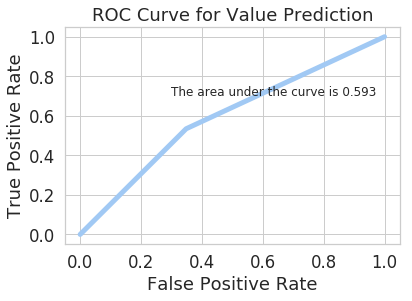

In [51]:
def roc(y, p):
    fpr, tpr, thresholds = roc_curve(y, p)
    auc = roc_auc_score(y, p)
    plt.plot(fpr, tpr, linewidth=5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate');
    plt.title('ROC Curve for Value Prediction');
    plt.text(0.3, 0.7, 'The area under the curve is %.3g' % auc, fontsize=12)
    return auc
roc(p1,a1)